In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
%matplotlib inline

## 讀取檔案

In [3]:
movies_df = pd.read_csv('movies_data_20191030_v3.csv')

In [4]:
movies_df['tmdb_id'] = movies_df['tmdb_id'].astype('int')
movies_df['Total_gross'] = movies_df['Total_gross'].astype('float64')
movies_df['Release_date'] = movies_df['Release_date'].astype('datetime64')
movies_df['release_in_holidayweek'] = movies_df['release_in_holidayweek'].astype('int')
movies_df['homepage'] = movies_df['homepage'].astype('int')
movies_df['have_comments'] = movies_df['have_comments'].astype('int32')

In [5]:
movies_df['adj_total_gross'] = movies_df['Total_gross'] / movies_df['gdp_deflator']

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6296 entries, 0 to 6295
Data columns (total 75 columns):
tmdb_id                           6296 non-null int32
mojo_title                        6296 non-null object
original_title                    6296 non-null object
tagline                           3619 non-null object
collection_id                     668 non-null float64
budget                            2401 non-null float64
Total_gross                       6296 non-null float64
comments_total_qty                6296 non-null float64
sc_negative                       6296 non-null float64
sc_neutral                        6296 non-null float64
sc_positive                       6296 non-null float64
total_sentiment_level             6296 non-null object
holidayweek                       1019 non-null object
Release_date                      6296 non-null datetime64[ns]
Release_year                      6296 non-null int64
Release_month                     6296 non-null int64
Re

## Actor

In [7]:
movies_df['1st_cast'] = movies_df['1st_cast'].apply(lambda x: 0 if x == 'unknown' else int(eval(x)))
movies_df['2nd_cast'] = movies_df['2nd_cast'].apply(lambda x: 0 if x == 'unknown' else int(eval(x)))
movies_df['3rd_cast'] = movies_df['3rd_cast'].apply(lambda x: 0 if x == 'unknown' else int(eval(x)))

In [8]:
movies_df['1st_cast'].unique().size

3672

In [9]:
movies_df['2nd_cast'].unique().size

4067

In [10]:
movies_df['3rd_cast'].unique().size

4317

### Numbers of Cast

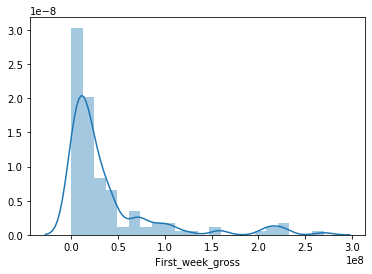

In [11]:
sns.distplot(movies_df.groupby('num_cast')['First_week_gross'].mean())

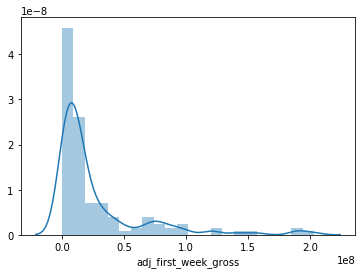

In [12]:
sns.distplot(movies_df.groupby('num_cast')['adj_first_week_gross'].mean())

### Actor Distribution by mean of first week gross

In [13]:
cast_list = pd.read_csv('D:/Movie/actor_list.csv')
cast_list = cast_list.iloc[:,:3]
cast_list.head()

,id,name,gender
0,1,George Lucas,2
1,2,Mark Hamill,2
2,3,Harrison Ford,2
3,4,Carrie Fisher,1
4,6,Anthony Daniels,2


In [14]:
temp = movies_df.groupby('1st_cast')['tmdb_id'].count().reset_index()
temp.rename(columns={'tmdb_id':'1st_qty'}, inplace=True)
cast_list = pd.merge(cast_list, temp, how='left', left_on='id', right_on='1st_cast').drop(columns='1st_cast')

In [15]:
temp = movies_df.groupby('2nd_cast')['tmdb_id'].count().reset_index()
temp.rename(columns={'tmdb_id':'2nd_qty'}, inplace=True)
cast_list = pd.merge(cast_list, temp, how='left', left_on='id', right_on='2nd_cast').drop(columns='2nd_cast')

In [16]:
temp = movies_df.groupby('3rd_cast')['tmdb_id'].count().reset_index()
temp.rename(columns={'tmdb_id':'3rd_qty'}, inplace=True)
cast_list = pd.merge(cast_list, temp, how='left', left_on='id', right_on='3rd_cast').drop(columns='3rd_cast')

In [17]:
cast_list.fillna(0, inplace=True)
cast_list['total_qty'] = cast_list['1st_qty'] + cast_list['2nd_qty'] + cast_list['3rd_qty']
cast_list.sort_values(by='total_qty', ascending=False, inplace=True)
cast_list.head()

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty
1213,3896,Liam Neeson,2,19.0,5.0,2.0,26.0
3864,17288,Michael Fassbender,2,13.0,6.0,4.0,23.0
6258,35070,Akshay Kumar,2,22.0,0.0,1.0,23.0
3187,13240,Mark Wahlberg,2,14.0,4.0,4.0,22.0
226,569,Ethan Hawke,2,14.0,5.0,3.0,22.0


In [18]:
temp = movies_df.groupby('1st_cast')['First_week_gross'].mean().reset_index()
temp.rename(columns={'1st_cast':'id', 'First_week_gross':'1st_cast_week_mean'}, inplace=True)
cast_list = pd.merge(cast_list, temp, how='left', on='id')

In [19]:
temp = movies_df.groupby('2nd_cast')['First_week_gross'].mean().reset_index()
temp.rename(columns={'2nd_cast':'id', 'First_week_gross':'2nd_cast_week_mean'}, inplace=True)
cast_list = pd.merge(cast_list, temp, how='left', on='id')

In [20]:
temp = movies_df.groupby('3rd_cast')['First_week_gross'].mean().reset_index()
temp.rename(columns={'3rd_cast':'id', 'First_week_gross':'3rd_cast_week_mean'}, inplace=True)
cast_list = pd.merge(cast_list, temp, how='left', on='id')
cast_list.head()

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean
0,3896,Liam Neeson,2,19.0,5.0,2.0,26.0,1.966950e+07,9.576778e+06,11608672.00
1,17288,Michael Fassbender,2,13.0,6.0,4.0,23.0,6.038354e+06,3.971383e+07,45892346.75
2,35070,Akshay Kumar,2,22.0,0.0,1.0,23.0,6.210111e+05,NaN,48557.00
3,13240,Mark Wahlberg,2,14.0,4.0,4.0,22.0,3.166884e+07,4.759824e+07,9809142.50
4,569,Ethan Hawke,2,14.0,5.0,3.0,22.0,3.595117e+06,8.795138e+06,21194180.00


In [21]:
cast_list.fillna(0, inplace=True)

In [22]:
cast_list.sort_values(by='total_qty', ascending=False, inplace=True)
cast_list.head()

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean
0,3896,Liam Neeson,2,19.0,5.0,2.0,26.0,1.966950e+07,9.576778e+06,11608672.00
2,35070,Akshay Kumar,2,22.0,0.0,1.0,23.0,6.210111e+05,0.000000e+00,48557.00
1,17288,Michael Fassbender,2,13.0,6.0,4.0,23.0,6.038354e+06,3.971383e+07,45892346.75
3,13240,Mark Wahlberg,2,14.0,4.0,4.0,22.0,3.166884e+07,4.759824e+07,9809142.50
4,569,Ethan Hawke,2,14.0,5.0,3.0,22.0,3.595117e+06,8.795138e+06,21194180.00


In [23]:
cast_list[['1st_cast_week_mean','2nd_cast_week_mean','3rd_cast_week_mean']].describe()/10000

,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean
count,7.495300,7.495300,7.495300
mean,17.614546,26.060470,31.517457
std,310.991183,398.208737,449.878297
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,26944.669000,32652.315967,39085.605400


In [24]:
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

Text(0.5, 1.0, 'Opening Week Box Office Amount')

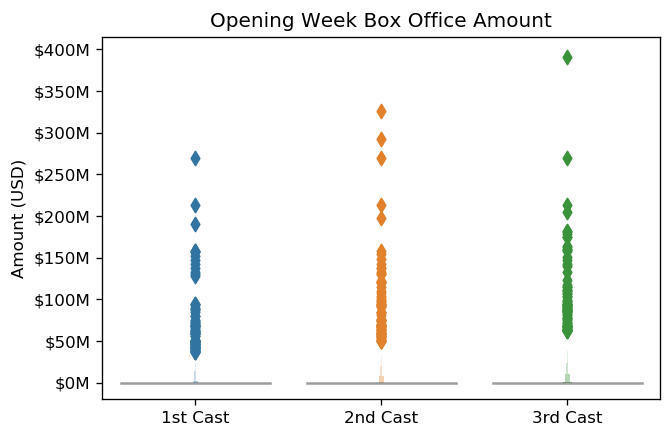

In [25]:
fig = plt.figure(dpi=120)
ax = sns.boxenplot(data=cast_list.iloc[:,7:])
ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(['1st Cast','2nd Cast','3rd Cast'])
ax.set_ylabel('Amount (USD)')
ax.set_title('Opening Week Box Office Amount')

#### 增加各演員在Level 1, 2, 3, 4的演出數量

In [26]:
temp = movies_df.pivot_table(index='1st_cast', columns='week_boxoffice_level(4)', values='tmdb_id', aggfunc='count').reset_index()
cast_list = pd.merge(cast_list, temp, how='left', left_on='id', right_on='1st_cast').drop(columns='1st_cast').rename(columns={1:'l1_1st',2:'l2_1st',3:'l3_1st',4:'l4_1st'})

In [27]:
temp = movies_df.pivot_table(index='2nd_cast', columns='week_boxoffice_level(4)', values='tmdb_id', aggfunc='count').reset_index()
cast_list = pd.merge(cast_list, temp, how='left', left_on='id', right_on='2nd_cast').drop(columns='2nd_cast').rename(columns={1:'l1_2nd',2:'l2_2nd',3:'l3_2nd',4:'l4_2nd'})

In [28]:
temp = movies_df.pivot_table(index='3rd_cast', columns='week_boxoffice_level(4)', values='tmdb_id', aggfunc='count').reset_index()
cast_list = pd.merge(cast_list, temp, how='left', left_on='id', right_on='3rd_cast').drop(columns='3rd_cast').rename(columns={1:'l1_3rd',2:'l2_3rd',3:'l3_3rd',4:'l4_3rd'})

In [29]:
cast_list.fillna(0, inplace=True)
cast_list = cast_list[cast_list['total_qty'] != 0]
cast_list.head()

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l3_1st,l4_1st,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd
0,3896,Liam Neeson,2,19.0,5.0,2.0,26.0,1.966950e+07,9.576778e+06,11608672.00,...,0.0,7.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0
1,35070,Akshay Kumar,2,22.0,0.0,1.0,23.0,6.210111e+05,0.000000e+00,48557.00,...,3.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,17288,Michael Fassbender,2,13.0,6.0,4.0,23.0,6.038354e+06,3.971383e+07,45892346.75,...,3.0,8.0,3.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0
3,13240,Mark Wahlberg,2,14.0,4.0,4.0,22.0,3.166884e+07,4.759824e+07,9809142.50,...,1.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0
4,569,Ethan Hawke,2,14.0,5.0,3.0,22.0,3.595117e+06,8.795138e+06,21194180.00,...,1.0,11.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0


In [30]:
cast_list.shape

(9488, 22)

### 計算三大要角L1演員與L2,3,4演員名單重複率

In [31]:
l1_1st_namelist = cast_list[cast_list['l1_1st'] > 0]['id'].tolist()
l2_1st_namelist = cast_list[cast_list['l2_1st'] > 0]['id'].tolist()
l3_1st_namelist = cast_list[cast_list['l3_1st'] > 0]['id'].tolist()
l4_1st_namelist = cast_list[cast_list['l4_1st'] > 0]['id'].tolist()

In [32]:
l1_2nd_namelist = cast_list[cast_list['l1_2nd'] > 0]['id'].tolist()
l2_2nd_namelist = cast_list[cast_list['l2_2nd'] > 0]['id'].tolist()
l3_2nd_namelist = cast_list[cast_list['l3_2nd'] > 0]['id'].tolist()
l4_2nd_namelist = cast_list[cast_list['l4_2nd'] > 0]['id'].tolist()

In [33]:
l1_3rd_namelist = cast_list[cast_list['l1_3rd'] > 0]['id'].tolist()
l2_3rd_namelist = cast_list[cast_list['l2_3rd'] > 0]['id'].tolist()
l3_3rd_namelist = cast_list[cast_list['l3_3rd'] > 0]['id'].tolist()
l4_3rd_namelist = cast_list[cast_list['l4_3rd'] > 0]['id'].tolist()

In [34]:
# L1 1st與L2,3,4 1st的重複率
1 - (len(set(l1_1st_namelist) - set(l2_1st_namelist + l3_1st_namelist + l4_1st_namelist)))/len(l1_1st_namelist)

0.7988505747126436

In [35]:
# L4 1st與L1,2,3 1st的重複率
1 - (len(set(l4_1st_namelist) - set(l2_1st_namelist + l3_1st_namelist + l1_1st_namelist)))/len(l4_1st_namelist)

0.11229458307973217

In [36]:
# L1 2nd與L2,3,4 2nd的重複率
1 - (len(set(l1_2nd_namelist) - set(l2_2nd_namelist + l3_2nd_namelist + l4_2nd_namelist)))/len(l1_2nd_namelist)

0.6944444444444444

In [37]:
# L4 2nd與L1,2,3 2nd的重複率
1 - (len(set(l4_2nd_namelist) - set(l2_2nd_namelist + l3_2nd_namelist + l1_2nd_namelist)))/len(l4_2nd_namelist)

0.11117528154779088

In [38]:
# L1 3rd與L2,3,4 3rd的重複率
1 - (len(set(l1_3rd_namelist) - set(l2_3rd_namelist + l3_3rd_namelist + l4_3rd_namelist)))/len(l1_3rd_namelist)

0.615702479338843

In [39]:
# L4 3rd與L1,2,3 3rd的重複率
1 - (len(set(l4_3rd_namelist) - set(l2_3rd_namelist + l3_3rd_namelist + l1_3rd_namelist)))/len(l4_3rd_namelist)

0.10396178701882552

### Level1的第一要角演員名單去比對其第二要角
* 第一演員名單有174人，第二演員名單有216人
* 第一演員去演第二要角的演員約45人→ 佔第二演員的20%

In [40]:
len(l1_1st_namelist), len(l1_2nd_namelist)

(174, 216)

In [41]:
len(set(l1_1st_namelist + l1_2nd_namelist + l1_3rd_namelist))

512

In [42]:
len(l1_1st_namelist) - len(set(l1_1st_namelist)-set(l1_2nd_namelist))

45

In [43]:
(len(l1_1st_namelist) - len(set(l1_1st_namelist)-set(l1_2nd_namelist))) / len(l1_2nd_namelist)

0.20833333333333334

### 票房毒藥(第一演員)

#### 演過L1第一要角去演L2,3,4的比例

In [44]:
l1_1st_cast = cast_list[cast_list['id'].isin(l1_1st_namelist)]
l1_1st_cast.head()

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l3_1st,l4_1st,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd
0,3896,Liam Neeson,2,19.0,5.0,2.0,26.0,1.966950e+07,9.576778e+06,1.160867e+07,...,0.0,7.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0
2,17288,Michael Fassbender,2,13.0,6.0,4.0,23.0,6.038354e+06,3.971383e+07,4.589235e+07,...,3.0,8.0,3.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0
3,13240,Mark Wahlberg,2,14.0,4.0,4.0,22.0,3.166884e+07,4.759824e+07,9.809142e+06,...,1.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0
5,17051,James Franco,2,12.0,7.0,3.0,22.0,1.617184e+07,1.125846e+07,3.168833e+04,...,1.0,8.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,3.0
6,5081,Emily Blunt,1,5.0,11.0,6.0,22.0,2.229386e+07,1.313375e+07,2.049925e+07,...,1.0,2.0,1.0,5.0,0.0,5.0,1.0,4.0,0.0,1.0


In [45]:
l1_1st_cast['other_level_pc'] = (l1_1st_cast['l2_1st'] + l1_1st_cast['l2_2nd'] + l1_1st_cast['l2_3rd'] + l1_1st_cast['l3_1st'] + l1_1st_cast['l3_2nd'] + cast_list['l3_3rd'] + l1_1st_cast['l4_1st'] + l1_1st_cast['l4_2nd'] + l1_1st_cast['l4_3rd']) / l1_1st_cast['l1_1st']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
l1_1st_cast.sort_values(by='other_level_pc', ascending=False).head(10)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l4_1st,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,other_level_pc
6,5081,Emily Blunt,1,5.0,11.0,6.0,22.0,2.229386e+07,1.313375e+07,2.049925e+07,...,2.0,1.0,5.0,0.0,5.0,1.0,4.0,0.0,1.0,19.0
2,17288,Michael Fassbender,2,13.0,6.0,4.0,23.0,6.038354e+06,3.971383e+07,4.589235e+07,...,8.0,3.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,17.0
35,2963,Nicolas Cage,2,15.0,0.0,1.0,16.0,1.334515e+07,0.000000e+00,7.454090e+05,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0
28,131,Jake Gyllenhaal,2,10.0,6.0,1.0,17.0,1.466665e+07,2.393351e+07,1.607230e+05,...,1.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,15.0
17,51329,Bradley Cooper,2,9.0,6.0,3.0,18.0,1.889180e+07,2.611922e+07,2.912928e+07,...,1.0,1.0,3.0,0.0,2.0,1.0,1.0,1.0,0.0,15.0
49,4764,John C. Reilly,2,6.0,5.0,4.0,15.0,1.747198e+07,2.618812e+06,1.140737e+06,...,2.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,3.0,14.0
44,29222,Zac Efron,2,11.0,3.0,2.0,16.0,1.927971e+07,2.337930e+07,1.691766e+07,...,3.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,14.0
54,5064,Meryl Streep,1,13.0,2.0,0.0,15.0,8.756094e+06,5.519725e+05,0.000000e+00,...,6.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,14.0
78,30614,Ryan Gosling,2,8.0,5.0,1.0,14.0,1.227691e+07,1.397412e+07,9.414040e+05,...,4.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,13.0
70,6807,Sam Rockwell,2,6.0,4.0,4.0,14.0,1.336080e+07,3.037101e+06,1.510538e+05,...,4.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,4.0,13.0


#### 演過L1 第一要角去演 L2,3,4第一要角的比例

In [47]:
l1_1st_cast['other_level_1st_pc'] = (l1_1st_cast['l2_1st'] + l1_1st_cast['l3_1st'] + l1_1st_cast['l4_1st'] ) / l1_1st_cast['l1_1st']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
l1_1st_cast.sort_values(by='other_level_1st_pc', ascending=False)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,other_level_pc,other_level_1st_pc
35,2963,Nicolas Cage,2,15.0,0.0,1.0,16.0,1.334515e+07,0.000000e+00,7.454090e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.000000,14.0
2,17288,Michael Fassbender,2,13.0,6.0,4.0,23.0,6.038354e+06,3.971383e+07,4.589235e+07,...,3.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,17.000000,12.0
54,5064,Meryl Streep,1,13.0,2.0,0.0,15.0,8.756094e+06,5.519725e+05,0.000000e+00,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,14.000000,12.0
27,17276,Gerard Butler,2,12.0,3.0,2.0,17.0,1.631264e+07,4.407070e+07,4.386253e+07,...,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,13.000000,11.0
89,3894,Christian Bale,2,11.0,1.0,1.0,13.0,2.693698e+07,4.339350e+05,5.624018e+06,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12.000000,10.0
158,80602,Tyler Perry,2,11.0,0.0,0.0,11.0,2.981335e+07,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,10.0
44,29222,Zac Efron,2,11.0,3.0,2.0,16.0,1.927971e+07,2.337930e+07,1.691766e+07,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,14.000000,10.0
28,131,Jake Gyllenhaal,2,10.0,6.0,1.0,17.0,1.466665e+07,2.393351e+07,1.607230e+05,...,1.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,15.000000,9.0
0,3896,Liam Neeson,2,19.0,5.0,2.0,26.0,1.966950e+07,9.576778e+06,1.160867e+07,...,1.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,11.500000,8.5
58,55638,Kevin Hart,2,9.0,3.0,3.0,15.0,2.112793e+07,4.975506e+07,7.914607e+07,...,3.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,9.000000,8.0


In [49]:
len(set(l1_1st_namelist + l1_2nd_namelist + l1_3rd_namelist))

512

#### 演過L1第一要角，其L2,3,4的第一要角數量最高者

In [50]:
l1_1st_cast['other_level_1st_pc2'] = (l1_1st_cast['l2_1st'] + l1_1st_cast['l3_1st'] + l1_1st_cast['l4_1st'] ) / l1_1st_cast['1st_qty']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
l1_1st_cast[l1_1st_cast['1st_qty'] > 5].sort_values(by='other_level_1st_pc2', ascending=False).head(10)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,other_level_pc,other_level_1st_pc,other_level_1st_pc2
35,2963,Nicolas Cage,2,15.0,0.0,1.0,16.0,1.334515e+07,0.000000e+00,7.454090e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,14.0,0.933333
54,5064,Meryl Streep,1,13.0,2.0,0.0,15.0,8.756094e+06,5.519725e+05,0.000000e+00,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,14.0,12.0,0.923077
2,17288,Michael Fassbender,2,13.0,6.0,4.0,23.0,6.038354e+06,3.971383e+07,4.589235e+07,...,0.0,1.0,2.0,2.0,1.0,0.0,1.0,17.0,12.0,0.923077
27,17276,Gerard Butler,2,12.0,3.0,2.0,17.0,1.631264e+07,4.407070e+07,4.386253e+07,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,13.0,11.0,0.916667
158,80602,Tyler Perry,2,11.0,0.0,0.0,11.0,2.981335e+07,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.909091
44,29222,Zac Efron,2,11.0,3.0,2.0,16.0,1.927971e+07,2.337930e+07,1.691766e+07,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,14.0,10.0,0.909091
89,3894,Christian Bale,2,11.0,1.0,1.0,13.0,2.693698e+07,4.339350e+05,5.624018e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12.0,10.0,0.909091
28,131,Jake Gyllenhaal,2,10.0,6.0,1.0,17.0,1.466665e+07,2.393351e+07,1.607230e+05,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,15.0,9.0,0.900000
0,3896,Liam Neeson,2,19.0,5.0,2.0,26.0,1.966950e+07,9.576778e+06,1.160867e+07,...,0.0,2.0,2.0,0.0,1.0,0.0,1.0,11.5,8.5,0.894737
17,51329,Bradley Cooper,2,9.0,6.0,3.0,18.0,1.889180e+07,2.611922e+07,2.912928e+07,...,3.0,0.0,2.0,1.0,1.0,1.0,0.0,15.0,8.0,0.888889


In [52]:
movies_df[movies_df['1st_cast']==5064]

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
27,22897,It's Complicated,It's Complicated,First comes marriage. Then comes divorce. And ...,NaN,85000000.0,112735375.0,0.0,0.0,0.0,...,0.762350,9.2542,-2.536757,40375875,5.296239e+07,1,1,1,1,1.478788e+08
33,24803,Julie & Julia,Julie & Julia,Based on Two True Stories,NaN,40000000.0,94125426.0,0.0,0.0,0.0,...,0.762350,9.2542,-2.536757,31284468,4.103688e+07,2,1,2,2,1.234675e+08
1073,71688,The Iron Lady,The Iron Lady,Never Compromise,NaN,13000000.0,30017992.0,475.0,130.0,123.0,...,2.088904,8.9492,1.550836,344295,1.648209e+05,2,3,2,4,1.437021e+07
1571,82696,Hope Springs,Hope Springs,"Sometimes to keep the magic, you need to learn...",NaN,30000000.0,63536011.0,0.0,0.0,0.0,...,1.917849,8.0694,2.249546,4453057,2.321902e+06,2,2,2,3,3.312879e+07
1639,92837,To the Arctic (IMAX),To the Arctic,NaN,NaN,NaN,14551252.0,164.0,27.0,67.0,...,1.917849,8.0694,2.249546,435001,2.268171e+05,2,3,2,4,7.587277e+06
2173,152737,August: Osage County,August: Osage County,Misery loves family,NaN,25000000.0,37738810.0,959.0,180.0,253.0,...,1.754916,7.3749,1.842081,341769,1.947495e+05,2,3,2,4,2.150463e+07
2528,84196,A Fierce Green Fire,A Fierce Green Fire,NaN,NaN,NaN,29817.0,0.0,0.0,0.0,...,1.754916,7.3749,1.842081,12106,6.898337e+03,5,5,4,4,1.699056e+04
2722,224141,Into the Woods,Into the Woods,Be careful what you wish for...,NaN,50000000.0,128002372.0,2075.0,483.0,501.0,...,1.891891,6.1675,2.451973,15089740,7.976008e+06,1,1,1,2,6.765842e+07
3414,275601,Ricki and the Flash,Ricki and the Flash,Get Ready for Ricki.,NaN,18000000.0,26822144.0,518.0,104.0,163.0,...,1.069342,5.2800,2.880910,10085717,9.431707e+06,2,1,2,2,2.508286e+07
3898,346152,Shout Gladi Gladi,Shout Gladi Gladi,NaN,NaN,NaN,5839.0,1.0,0.0,1.0,...,1.069342,5.2800,2.880910,5521,5.162990e+03,6,6,4,4,5.460369e+03


#### 演過L1電影，Level 1電影數量與Level 4電影數量的比例

In [53]:
l1_cast = cast_list[cast_list['id'].isin(set(l1_1st_namelist + l1_2nd_namelist + l1_3rd_namelist))]
l1_cast.head()

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l3_1st,l4_1st,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd
0,3896,Liam Neeson,2,19.0,5.0,2.0,26.0,1.966950e+07,9.576778e+06,1.160867e+07,...,0.0,7.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0
2,17288,Michael Fassbender,2,13.0,6.0,4.0,23.0,6.038354e+06,3.971383e+07,4.589235e+07,...,3.0,8.0,3.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0
3,13240,Mark Wahlberg,2,14.0,4.0,4.0,22.0,3.166884e+07,4.759824e+07,9.809142e+06,...,1.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0
4,569,Ethan Hawke,2,14.0,5.0,3.0,22.0,3.595117e+06,8.795138e+06,2.119418e+07,...,1.0,11.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0
5,17051,James Franco,2,12.0,7.0,3.0,22.0,1.617184e+07,1.125846e+07,3.168833e+04,...,1.0,8.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,3.0


In [54]:
l1_cast['level4_pc'] = (l1_cast['l4_1st']+l1_cast['l4_2nd'] +l1_cast['l4_3rd'] ) / (l1_cast['l1_1st'] + l1_cast['l1_2nd'] + l1_cast['l1_3rd'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
l1_cast.sort_values(by='level4_pc', ascending=False).head(10)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l4_1st,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,level4_pc
11,1231,Julianne Moore,1,9.0,6.0,6.0,21.0,3.150231e+05,1.173865e+07,1.532300e+07,...,8.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,3.0,13.0
59,18050,Elle Fanning,1,7.0,6.0,2.0,15.0,1.732539e+05,1.584157e+07,1.021683e+07,...,7.0,1.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,12.0
71,2227,Nicole Kidman,1,4.0,5.0,5.0,14.0,7.721950e+05,1.405470e+05,1.423339e+07,...,3.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,3.0,11.0
77,2039,Brendan Gleeson,2,4.0,4.0,6.0,14.0,8.632225e+04,1.172275e+04,1.150110e+07,...,4.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,3.0,11.0
70,6807,Sam Rockwell,2,6.0,4.0,4.0,14.0,1.336080e+07,3.037101e+06,1.510538e+05,...,4.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,4.0,10.0
100,290,Christopher Plummer,2,5.0,6.0,2.0,13.0,1.031970e+06,1.342263e+06,4.653682e+07,...,4.0,0.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,10.0
93,72855,Felicity Jones,1,4.0,7.0,2.0,13.0,5.570312e+07,3.201905e+06,1.358260e+06,...,3.0,0.0,1.0,1.0,5.0,0.0,0.0,1.0,1.0,9.0
112,133,Peter Sarsgaard,2,2.0,5.0,5.0,12.0,1.117750e+04,4.095729e+06,1.566374e+07,...,2.0,0.0,1.0,0.0,4.0,1.0,0.0,1.0,3.0,9.0
102,3036,John Cusack,2,5.0,4.0,4.0,13.0,2.222638e+07,7.687840e+05,8.127725e+04,...,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,4.0,9.0
26,3061,Ewan McGregor,2,8.0,6.0,3.0,17.0,5.040558e+06,1.486126e+07,1.349013e+07,...,6.0,1.0,2.0,0.0,3.0,0.0,1.0,2.0,0.0,9.0


#### 演過L1電影，Level 1電影與L2,3,4電影的比例

In [56]:
l1_cast['other_level_all_pc'] = (l1_cast['l2_1st'] + l1_cast['l3_1st'] + l1_cast['l4_1st'] +  l1_cast['l2_2nd'] + l1_cast['l3_2nd'] + l1_cast['l4_2nd'] +  l1_cast['l2_3rd'] + l1_cast['l3_3rd'] + l1_cast['l4_3rd']) / (l1_cast['l1_1st'] + l1_cast['l1_2nd'] + l1_cast['l1_3rd'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
l1_cast.sort_values(by='other_level_all_pc', ascending=False).head(10)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,level4_pc,other_level_all_pc
11,1231,Julianne Moore,1,9.0,6.0,6.0,21.0,3.150231e+05,1.173865e+07,1.532300e+07,...,0.0,2.0,2.0,2.0,1.0,2.0,0.0,3.0,13.0,20.0
26,3061,Ewan McGregor,2,8.0,6.0,3.0,17.0,5.040558e+06,1.486126e+07,1.349013e+07,...,1.0,2.0,0.0,3.0,0.0,1.0,2.0,0.0,9.0,16.0
30,56734,Chloë Grace Moretz,1,5.0,7.0,5.0,17.0,1.200738e+07,7.777482e+06,9.425993e+06,...,0.0,2.0,2.0,3.0,1.0,0.0,1.0,3.0,7.0,16.0
36,10297,Matthew McConaughey,2,12.0,3.0,1.0,16.0,7.345154e+06,2.324598e+07,1.212990e+05,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,15.0
35,2963,Nicolas Cage,2,15.0,0.0,1.0,16.0,1.334515e+07,0.000000e+00,7.454090e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,15.0
54,5064,Meryl Streep,1,13.0,2.0,0.0,15.0,8.756094e+06,5.519725e+05,0.000000e+00,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,14.0
52,9273,Amy Adams,1,5.0,7.0,3.0,15.0,9.164898e+06,2.323373e+07,5.313587e+05,...,1.0,4.0,2.0,0.0,0.0,0.0,1.0,2.0,4.0,14.0
49,4764,John C. Reilly,2,6.0,5.0,4.0,15.0,1.747198e+07,2.618812e+06,1.140737e+06,...,0.0,1.0,0.0,4.0,0.0,0.0,1.0,3.0,9.0,14.0
59,18050,Elle Fanning,1,7.0,6.0,2.0,15.0,1.732539e+05,1.584157e+07,1.021683e+07,...,1.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,12.0,14.0
70,6807,Sam Rockwell,2,6.0,4.0,4.0,14.0,1.336080e+07,3.037101e+06,1.510538e+05,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,4.0,10.0,13.0


### 票房糖果(第一演員)

#### 演過L1電影，但完全沒演過L2,3,4

In [58]:
candy_list = l1_cast[l1_cast['total_qty'] == (l1_cast['l1_1st'] + l1_cast['l1_2nd'] + l1_cast['l1_3rd'])]
candy_list.sort_values(by='total_qty', ascending=False)
candy_list.head(10)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,level4_pc,other_level_all_pc
1457,33337,Eric Johnson,2,0.0,0.0,2.0,2.0,0.0,0.0,63943955.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1477,34195,Jayma Mays,1,0.0,0.0,2.0,2.0,0.0,0.0,49251014.5,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1746,156962,Eric Stonestreet,2,0.0,2.0,0.0,2.0,0.0,110416127.5,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006,13726,Ned Beatty,2,0.0,0.0,2.0,2.0,0.0,0.0,106577468.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2087,82809,Annabelle Wallis,1,1.0,1.0,0.0,2.0,45790572.0,42610700.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2141,240724,Naomi Scott,1,0.0,2.0,0.0,2.0,0.0,96629672.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2506,566080,Jonas Bloquet,2,0.0,0.0,1.0,1.0,0.0,0.0,66876325.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2532,237405,Lady Gaga,1,1.0,0.0,0.0,1.0,66160360.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2549,1704256,Deric McCabe,2,0.0,1.0,0.0,1.0,0.0,44494654.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2570,1393184,Marleik 'Mar Mar' Walker,0,0.0,0.0,1.0,1.0,0.0,0.0,58289856.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### 演過L1電影，但完全沒演過L2,3,4，其當過第一要角最多者

In [59]:
candy_list.sort_values(by='1st_qty', ascending=False)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,level4_pc,other_level_all_pc
9348,112560,Quinton Aaron,2,1.0,0.0,0.0,1.0,60127477.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4616,14,Ellen DeGeneres,1,1.0,0.0,0.0,1.0,213317902.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4549,12073,Mike Myers,2,1.0,0.0,0.0,1.0,89750351.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8455,1525047,Dacre Montgomery,2,1.0,0.0,0.0,1.0,50562170.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3155,1393177,Noah Schnapp,2,1.0,0.0,0.0,1.0,58289856.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2777,8977,Craig T. Nelson,2,1.0,0.0,0.0,1.0,269446690.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2726,5374,Jim Parsons,2,1.0,0.0,0.0,1.0,68230094.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8516,68812,Ed Asner,2,1.0,0.0,0.0,1.0,93072435.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2679,23633,Walt Flanagan,2,1.0,0.0,0.0,1.0,94656400.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6808,51300,Derek Mears,2,1.0,0.0,0.0,1.0,47177191.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
movies_df[movies_df['1st_cast']==12073]

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
492,10192,Shrek Forever After,Shrek Forever After,It ain't Ogre... Til it's Ogre,2150.0,165000000.0,238736787.0,1004.0,175.0,336.0,...,1.165251,9.6334,2.563767,89750351,7.702236e+07,1,1,1,1,2.048802e+08


#### 演過L1第一要角，去演 L2,3,4第一要角的比例最低者

In [61]:
l1_1st_cast.sort_values(by='other_level_1st_pc', ascending=True).head(10)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,other_level_pc,other_level_1st_pc,other_level_1st_pc2
263,52018,Britt Robertson,1,1.0,4.0,3.0,8.0,49385651.0,5.500598e+06,7.370031e+06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,7.0,0.0,0.0
8516,68812,Ed Asner,2,1.0,0.0,0.0,1.0,93072435.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,28846,Alexander Skarsgård,2,1.0,3.0,4.0,8.0,60797712.0,7.760333e+04,1.010069e+07,...,0.0,0.0,3.0,0.0,1.0,1.0,2.0,7.0,0.0,0.0
449,17286,Lena Headey,1,1.0,1.0,4.0,6.0,43644850.0,3.427400e+04,1.695552e+07,...,0.0,0.0,1.0,1.0,0.0,1.0,2.0,4.0,0.0,0.0
687,1274508,Jaeden Martell,2,1.0,3.0,0.0,4.0,158710619.0,8.568390e+05,0.000000e+00,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
718,90633,Gal Gadot,1,1.0,0.0,3.0,4.0,147822503.0,0.000000e+00,1.227996e+08,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
749,1267329,Lupita Nyong'o,1,1.0,0.0,3.0,4.0,94614440.0,0.000000e+00,9.787246e+07,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0
752,1136406,Tom Holland,2,2.0,0.0,2.0,4.0,127777082.0,0.000000e+00,1.727235e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
769,15232,Ty Burrell,2,1.0,1.0,2.0,4.0,41979916.0,2.183769e+07,5.020020e+05,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0
1134,1371398,O'Shea Jackson Jr.,2,1.0,0.0,2.0,3.0,84723470.0,0.000000e+00,6.892526e+06,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0


#### 演過L1電影，其Level4數量比Level1數量比值最小者

In [62]:
l1_cast.sort_values(by=['level4_pc','total_qty'], ascending=True).head(10)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,level4_pc,other_level_all_pc
2506,566080,Jonas Bloquet,2,0.0,0.0,1.0,1.0,0.0,0.0,66876325.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2532,237405,Lady Gaga,1,1.0,0.0,0.0,1.0,66160360.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2549,1704256,Deric McCabe,2,0.0,1.0,0.0,1.0,0.0,44494654.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2570,1393184,Marleik 'Mar Mar' Walker,0,0.0,0.0,1.0,1.0,0.0,0.0,58289856.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2612,8873,Annie Potts,1,0.0,0.0,1.0,1.0,0.0,0.0,178989809.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2679,23633,Walt Flanagan,2,1.0,0.0,0.0,1.0,94656400.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2682,24264,Craig Ferguson,2,0.0,0.0,1.0,1.0,0.0,0.0,63125872.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2726,5374,Jim Parsons,2,1.0,0.0,0.0,1.0,68230094.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2777,8977,Craig T. Nelson,2,1.0,0.0,0.0,1.0,269446690.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2947,1356210,Millie Bobby Brown,1,0.0,0.0,1.0,1.0,0.0,0.0,63057097.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### 演過L1第一要角的演員，其出演第一要角的電影中L1數量比例最高

In [63]:
l1_1st_cast['level_1st_pc'] = (l1_1st_cast['l1_1st']) / l1_1st_cast['1st_qty']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
l1_1st_cast.sort_values(by='level_1st_pc', ascending=False).head(10)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,other_level_pc,other_level_1st_pc,other_level_1st_pc2,level_1st_pc
9348,112560,Quinton Aaron,2,1.0,0.0,0.0,1.0,60127477.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
749,1267329,Lupita Nyong'o,1,1.0,0.0,3.0,4.0,94614440.0,0.0,97872458.0,...,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0
2726,5374,Jim Parsons,2,1.0,0.0,0.0,1.0,68230094.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2679,23633,Walt Flanagan,2,1.0,0.0,0.0,1.0,94656400.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2532,237405,Lady Gaga,1,1.0,0.0,0.0,1.0,66160360.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2292,17183,Jackie Earle Haley,2,1.0,1.0,0.0,2.0,67934692.0,39360171.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2124,1687041,Fionn Whitehead,2,1.0,1.0,0.0,2.0,74706220.0,114639.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2087,82809,Annabelle Wallis,1,1.0,1.0,0.0,2.0,45790572.0,42610700.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020,206919,Daniel Kaluuya,2,1.0,1.0,0.0,2.0,49843640.0,4771770.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1693,1001657,Sophie Turner,1,1.0,1.0,0.0,2.0,42762350.0,3271.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### 演過L1第一要角的演員，其出演第一要角的電影中L1數量比例最高，且作品數量大於L1第一要角演員作品平均

In [65]:
l1_1st_cast['total_qty'].mean()

9.017241379310345

In [66]:
l1_1st_cast[l1_1st_cast['total_qty'] > 9].sort_values(by='level_1st_pc', ascending=False).head(10)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,other_level_pc,other_level_1st_pc,other_level_1st_pc2,level_1st_pc
87,3223,Robert Downey Jr.,2,10.0,2.0,1.0,13.0,1.906326e+08,1.211162e+08,1.630703e+08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.222222,0.111111,0.100000,0.900000
10,37917,Kristen Stewart,1,9.0,8.0,4.0,21.0,8.005261e+07,2.078048e+06,1.087010e+05,...,2.0,6.0,0.0,0.0,0.0,4.0,3.200000,0.800000,0.444444,0.555556
173,5723,John Leguizamo,2,2.0,3.0,5.0,10.0,3.421388e+07,1.889406e+07,1.579657e+07,...,0.0,1.0,1.0,1.0,1.0,2.0,8.000000,1.000000,0.500000,0.500000
64,64,Gary Oldman,2,2.0,8.0,4.0,14.0,2.051780e+07,1.380068e+07,9.061631e+07,...,3.0,2.0,2.0,1.0,1.0,0.0,10.000000,1.000000,0.500000,0.500000
151,500,Tom Cruise,2,10.0,0.0,1.0,11.0,3.900571e+07,0.000000e+00,2.076324e+07,...,0.0,0.0,0.0,1.0,0.0,0.0,1.200000,1.000000,0.500000,0.500000
131,19292,Adam Sandler,2,11.0,0.0,0.0,11.0,3.703706e+07,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.200000,1.200000,0.545455,0.454545
118,5292,Denzel Washington,2,12.0,0.0,0.0,12.0,3.115185e+07,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.400000,1.400000,0.583333,0.416667
16,5530,James McAvoy,2,12.0,4.0,2.0,18.0,3.572111e+07,4.955043e+07,7.970522e+06,...,0.0,1.0,0.0,1.0,0.0,1.0,2.200000,1.400000,0.583333,0.416667
76,21007,Jonah Hill,2,5.0,6.0,3.0,14.0,3.492921e+07,1.249183e+07,2.599028e+07,...,0.0,2.0,1.0,1.0,1.0,0.0,5.500000,1.500000,0.600000,0.400000
192,10959,Shia LaBeouf,2,5.0,4.0,1.0,10.0,3.166532e+07,6.532358e+06,2.427770e+05,...,0.0,3.0,0.0,0.0,0.0,1.0,4.000000,1.500000,0.600000,0.400000


#### 演過L1第一要角的演員，其出演第一要角的電影中L1數量比例最高，且主演作品數量大於L1第一要角主演作品平均

In [67]:
l1_1st_cast['1st_qty'].mean()

5.35632183908046

In [68]:
l1_1st_cast[l1_1st_cast['1st_qty'] > 5].sort_values(by='level_1st_pc', ascending=False).head(10)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,other_level_pc,other_level_1st_pc,other_level_1st_pc2,level_1st_pc
231,73457,Chris Pratt,2,6.0,2.0,1.0,9.0,1.567209e+08,2.661555e+07,12520542.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.000000,0.000000,1.000000
87,3223,Robert Downey Jr.,2,10.0,2.0,1.0,13.0,1.906326e+08,1.211162e+08,163070314.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.222222,0.111111,0.100000,0.900000
225,18277,Sandra Bullock,1,7.0,1.0,1.0,9.0,6.254843e+07,6.012748e+07,202274.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.600000,0.400000,0.285714,0.714286
266,12835,Vin Diesel,2,8.0,0.0,0.0,8.0,8.907829e+07,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.600000,0.375000,0.625000
10,37917,Kristen Stewart,1,9.0,8.0,4.0,21.0,8.005261e+07,2.078048e+06,108701.0,...,2.0,6.0,0.0,0.0,0.0,4.0,3.200000,0.800000,0.444444,0.555556
151,500,Tom Cruise,2,10.0,0.0,1.0,11.0,3.900571e+07,0.000000e+00,20763244.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.200000,1.000000,0.500000,0.500000
213,6193,Leonardo DiCaprio,2,8.0,0.0,1.0,9.0,3.700581e+07,0.000000e+00,33320265.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.250000,1.000000,0.500000,0.500000
229,94185,Shailene Woodley,1,6.0,3.0,0.0,9.0,4.214314e+07,3.780510e+06,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,2.000000,1.000000,0.500000,0.500000
131,19292,Adam Sandler,2,11.0,0.0,0.0,11.0,3.703706e+07,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.200000,1.200000,0.545455,0.454545
255,10980,Daniel Radcliffe,2,7.0,2.0,0.0,9.0,7.168659e+07,6.287770e+05,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.000000,1.333333,0.571429,0.428571


In [69]:
movies_df[movies_df['1st_cast']==18277]

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
15,18240,The Proposal,The Proposal,Here comes the bribe...,NaN,40000000.0,163958031.0,0.0,0.0,0.0,...,0.762350,9.2542,-2.536757,50583930,6.635263e+07,1,1,1,1,2.150692e+08
82,23706,All About Steve,All About Steve,A Comedy That Clings,NaN,15000000.0,33862903.0,0.0,0.0,0.0,...,0.762350,9.2542,-2.536757,16012385,2.100398e+07,2,1,2,2,4.441910e+07
2102,49047,Gravity,Gravity,Don't Let Go,NaN,105000000.0,274092705.0,19433.0,6125.0,5451.0,...,1.754916,7.3749,1.842081,79134919,4.509329e+07,1,1,1,1,1.561857e+08
2111,136795,The Heat,The Heat,Action's never been so hot!,NaN,43000000.0,159582188.0,1003.0,176.0,336.0,...,1.754916,7.3749,1.842081,61495288,3.504173e+07,1,1,1,1,9.093439e+07
3332,211672,Minions,Minions,"Before Gru, they had a history of bad bosses",544669.0,74000000.0,336045770.0,5675.0,666.0,2590.0,...,1.069342,5.2800,2.880910,166491710,1.556955e+08,1,1,1,1,3.142548e+08
3463,10317,Our Brand Is Crisis (2015),Our Brand Is Crisis,May the best campaign win.,NaN,28000000.0,7002261.0,256.0,66.0,92.0,...,1.069342,5.2800,2.880910,4500632,4.208788e+06,3,2,3,3,6.548198e+06
5227,402900,Ocean's 8,Ocean's Eight,Every con has its pros,304.0,70000000.0,140218711.0,24456.0,8585.0,7139.0,...,2.255302,3.8956,2.856988,59620170,2.643556e+07,1,1,1,1,6.217292e+07


### 票房毒藥(第二要角)

In [70]:
l1_2nd_cast = cast_list[cast_list['id'].isin(l1_2nd_namelist)]
l1_2nd_cast.head()

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l3_1st,l4_1st,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd
0,3896,Liam Neeson,2,19.0,5.0,2.0,26.0,1.966950e+07,9.576778e+06,11608672.00,...,0.0,7.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0
2,17288,Michael Fassbender,2,13.0,6.0,4.0,23.0,6.038354e+06,3.971383e+07,45892346.75,...,3.0,8.0,3.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0
3,13240,Mark Wahlberg,2,14.0,4.0,4.0,22.0,3.166884e+07,4.759824e+07,9809142.50,...,1.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0
4,569,Ethan Hawke,2,14.0,5.0,3.0,22.0,3.595117e+06,8.795138e+06,21194180.00,...,1.0,11.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0
6,5081,Emily Blunt,1,5.0,11.0,6.0,22.0,2.229386e+07,1.313375e+07,20499253.00,...,1.0,2.0,1.0,5.0,0.0,5.0,1.0,4.0,0.0,1.0


#### 演過L1第二要角，其L2,3,4的第二要角數量最高者

In [71]:
l1_2nd_cast['other_level_2nd_pc2'] = (l1_2nd_cast['l2_2nd'] + l1_2nd_cast['l3_2nd'] + l1_2nd_cast['l4_2nd'] ) / l1_2nd_cast['2nd_qty']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
l1_2nd_cast['2nd_qty'].mean()

3.2222222222222223

In [73]:
l1_2nd_cast[l1_2nd_cast['2nd_qty'] > 3].sort_values(by='other_level_2nd_pc2', ascending=False).head(10)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l4_1st,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,other_level_2nd_pc2
6,5081,Emily Blunt,1,5.0,11.0,6.0,22.0,22293864.60,1.313375e+07,2.049925e+07,...,2.0,1.0,5.0,0.0,5.0,1.0,4.0,0.0,1.0,0.909091
34,9827,Rose Byrne,1,1.0,10.0,5.0,16.0,94232.00,1.791418e+07,4.012143e+07,...,1.0,1.0,5.0,0.0,4.0,2.0,3.0,0.0,0.0,0.900000
74,11006,James Marsden,2,4.0,8.0,2.0,14.0,6596107.50,1.179499e+07,3.214532e+06,...,2.0,1.0,3.0,1.0,3.0,0.0,0.0,1.0,1.0,0.875000
64,64,Gary Oldman,2,2.0,8.0,4.0,14.0,20517799.50,1.380068e+07,9.061631e+07,...,1.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,0.0,0.875000
62,9281,Elizabeth Banks,1,4.0,8.0,2.0,14.0,2993515.50,1.142832e+07,4.766209e+07,...,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0,0.875000
13,57755,Woody Harrelson,2,4.0,8.0,7.0,19.0,539168.25,1.711181e+07,2.967336e+07,...,3.0,1.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0,0.875000
52,9273,Amy Adams,1,5.0,7.0,3.0,15.0,9164897.60,2.323373e+07,5.313587e+05,...,2.0,1.0,4.0,2.0,0.0,0.0,0.0,1.0,2.0,0.857143
117,4491,Jennifer Aniston,1,5.0,7.0,0.0,12.0,5038800.60,1.933884e+07,0.000000e+00,...,2.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.857143
156,27105,Ed Helms,2,2.0,7.0,2.0,11.0,3361906.00,2.258909e+07,1.507446e+07,...,1.0,1.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,0.857143
26,3061,Ewan McGregor,2,8.0,6.0,3.0,17.0,5040557.50,1.486126e+07,1.349013e+07,...,6.0,1.0,2.0,0.0,3.0,0.0,1.0,2.0,0.0,0.833333


### 票房糖果(第二要角)

#### 演過L1第二要角的演員，其出演第二要角的電影中L1數量比例最高，且作品數量大於L1主演第二要角作品平均

In [74]:
l1_2nd_cast['level_2nd_pc'] = (l1_2nd_cast['l1_2nd']) / l1_2nd_cast['2nd_qty']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
l1_2nd_cast[l1_2nd_cast['2nd_qty'] > 3].sort_values(by='level_2nd_pc', ascending=False).head(10)

,id,name,gender,1st_qty,2nd_qty,3rd_qty,total_qty,1st_cast_week_mean,2nd_cast_week_mean,3rd_cast_week_mean,...,l1_2nd,l2_2nd,l3_2nd,l4_2nd,l1_3rd,l2_3rd,l3_3rd,l4_3rd,other_level_2nd_pc2,level_2nd_pc
520,8167,Paul Walker,2,2.0,4.0,0.0,6.0,1.919407e+07,1.310908e+08,0.000000e+00,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
655,1254583,Jamie Dornan,2,1.0,4.0,0.0,5.0,1.784537e+06,5.871822e+07,0.000000e+00,...,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.250000,0.750000
129,976,Jason Statham,2,8.0,4.0,0.0,12.0,1.645224e+07,6.932932e+07,0.000000e+00,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.750000
94,103,Mark Ruffalo,2,4.0,4.0,5.0,13.0,4.469648e+05,7.036308e+07,9.502541e+07,...,3.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.250000,0.750000
199,27972,Josh Hutcherson,2,2.0,8.0,0.0,10.0,1.656947e+07,9.891703e+07,0.000000e+00,...,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.375000,0.625000
40,112,Cate Blanchett,1,7.0,7.0,2.0,16.0,9.176006e+05,4.194029e+07,4.995175e+07,...,4.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.428571,0.571429
2,17288,Michael Fassbender,2,13.0,6.0,4.0,23.0,6.038354e+06,3.971383e+07,4.589235e+07,...,3.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,0.500000,0.500000
431,77795,Katherine Waterston,1,1.0,4.0,1.0,6.0,4.282000e+03,3.358962e+07,1.109276e+08,...,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.500000,0.500000
445,62861,Andy Samberg,2,2.0,4.0,0.0,6.0,1.582128e+07,2.716215e+07,0.000000e+00,...,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.500000,0.500000
499,221581,Rebel Wilson,1,1.0,4.0,1.0,6.0,6.245347e+06,4.364636e+07,3.453072e+07,...,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.500000


### 計算L1,2,3,4演員unknown數量

In [ ]:
actor_tb = movies_df.pivot_table(index='week_boxoffice_level(4)', values='tmdb_id', aggfunc='count')
actor_tb.rename(columns={'tmdb_id':'qty'}, inplace=True)
actor_tb

In [ ]:
unknown_actor_qty, actor_qty = [],[]
for i in range(1,5):
    for item in ['1st_cast','2nd_cast','3rd_cast']:
#         print('Level' + str(i) + ' ' + item)
#         total_actor_qty.append(movies_df[(movies_df['week_boxoffice_level(4)'] == i)][item].shape[0])
        unknown_actor_qty.append(movies_df[(movies_df['week_boxoffice_level(4)'] == i) & (movies_df[item] == 0)].shape[0])
        actor_qty.append(movies_df[movies_df['week_boxoffice_level(4)'] == i][item].unique().size)

In [ ]:
unknown_actor_qty

In [ ]:
new_col_val1 = [actor_qty[:3], actor_qty[3:6], actor_qty[6:9], actor_qty[9:]]
actor_tb = actor_tb.join(pd.DataFrame(new_col_val1, index=actor_tb.index, columns=['1st_actor','2nd_actor','3rd_actor']))

In [ ]:
new_col_val2 = [unknown_actor_qty[:3], unknown_actor_qty[3:6], unknown_actor_qty[6:9], unknown_actor_qty[9:]]
actor_tb = actor_tb.join(pd.DataFrame(new_col_val2, index=actor_tb.index, columns=['1st_unknown','2nd_unknown','3rd_unknown']))

In [ ]:
actor_tb['1st_actor'] = actor_tb['1st_actor']-1
actor_tb['2nd_actor'] = actor_tb['2nd_actor']-1
actor_tb['3rd_actor'] = actor_tb['3rd_actor']-1

In [ ]:
actor_tb['1st_unknown_pc'] = actor_tb['1st_unknown'] / actor_tb['qty']
actor_tb['2nd_unknown_pc'] = actor_tb['2nd_unknown'] / actor_tb['qty']
actor_tb['3rd_unknown_pc'] = actor_tb['3rd_unknown'] / actor_tb['qty']

In [ ]:
actor_tb.sum(axis=0)

In [ ]:
actor_tb

### Top3電影組合比較

In [76]:
cast_pkg = pd.DataFrame(movies_df.groupby('top3_cast')['Total_gross'].sum()).reset_index()
cast_pkg.sort_values(by='Total_gross', ascending=False, inplace=True)
cast_pkg.head()

,top3_cast,Total_gross
4963,"[72129, 27972, 96066]",1.451539e+09
3581,"[37917, 11288, 84214]",1.170767e+09
3334,"[3223, 16828, 74568]",1.082364e+09
3237,"[3, 2, 4]",9.366622e+08
3333,"[3223, 16828, 103]",8.583730e+08


In [77]:
cast_name = pd.read_csv('D:/Movie/actor_list.csv')
cast_name = cast_name.iloc[:, :3]
cast_name.shape

(74953, 3)

In [78]:
def get_cast_name(x):
    id_list = eval(x)
    namelist = ''
    for i in id_list:
        itemname = cast_list[cast_list['id'] == i]['name'].values[0]
        namelist = namelist + itemname + ','
    return namelist

In [79]:
get_cast_name(cast_pkg.iloc[0][0])

'Jennifer Lawrence,Josh Hutcherson,Liam Hemsworth,'

In [81]:
cast_pkg['top3_name'] = cast_pkg['top3_cast'].apply(lambda x: x if x == 'unknown' else get_cast_name(x).rstrip(',') )
cast_pkg.head(10)

,top3_cast,Total_gross,top3_name
4963,"[72129, 27972, 96066]",1.451539e+09,"Jennifer Lawrence,Josh Hutcherson,Liam Hemsworth"
3581,"[37917, 11288, 84214]",1.170767e+09,"Kristen Stewart,Robert Pattinson,Taylor Lautner"
3334,"[3223, 16828, 74568]",1.082364e+09,"Robert Downey Jr.,Chris Evans,Chris Hemsworth"
3237,"[3, 2, 4]",9.366622e+08,"Harrison Ford,Mark Hamill,Carrie Fisher"
3333,"[3223, 16828, 103]",8.583730e+08,"Robert Downey Jr.,Chris Evans,Mark Ruffalo"
4763,"[65731, 8691, 32747]",7.605076e+08,"Sam Worthington,Zoe Saldana,Stephen Lang"
5024,"[73457, 8691, 543530]",7.229897e+08,"Chris Pratt,Zoe Saldana,Dave Bautista"
3331,"[3223, 12052, 1896]",7.214473e+08,"Robert Downey Jr.,Gwyneth Paltrow,Don Cheadle"
2024,"[172069, 135651, 1267329]",7.000596e+08,"Chadwick Boseman,Michael B. Jordan,Lupita Nyong'o"
342,"[10980, 10989, 10990]",6.832824e+08,"Daniel Radcliffe,Rupert Grint,Emma Watson"


In [82]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

Text(0.5, 1.0, 'Genres package by Box Office Amount of Level 1 Movies')

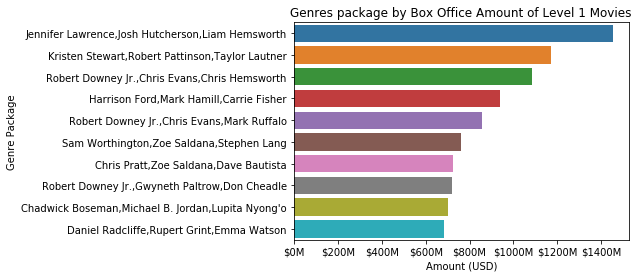

In [83]:
ax = sns.barplot(x=cast_pkg['Total_gross'].head(10), y=cast_pkg['top3_name'].head(10))
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel("Amount (USD)")
ax.set_ylabel("Genre Package")
ax.set_title("Genres package by Box Office Amount of Level 1 Movies")

In [86]:
movies_df[movies_df['top3_cast']=='[65731, 8691, 32747]']

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
0,19995,Avatar,Avatar,Enter the World of Pandora.,87096.0,237000000.0,760507625.0,0.0,0.0,0.0,...,0.76235,9.2542,-2.536757,137094001,1.798308e+08,1,1,1,1,9.975833e+08


In [87]:
movies_df[movies_df['top3_cast']=='[172069, 135651, 1267329]']

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
5205,284054,Black Panther,Black Panther,Long live the king.,529892.0,200000000.0,700059566.0,62219.0,11420.0,25660.0,...,2.255302,3.8956,2.856988,291954422,1.294525e+08,1,1,1,1,3.104061e+08


In [88]:
movies_df[movies_df['top3_cast']=='[10980, 10989, 10990]']

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
2,767,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince,Dark Secrets Revealed,1241.0,250000000.0,302089278.0,0.0,0.0,0.0,...,0.762350,9.2542,-2.536757,80186627,1.051835e+08,1,1,1,1,3.962606e+08
976,12445,Harry Potter and the Deathly Hallows Part 2,Harry Potter and the Deathly Hallows: Part 2,It all ends here.,1241.0,125000000.0,381193157.0,45758.0,12224.0,15875.0,...,2.088904,8.9492,1.550836,226117069,1.082468e+08,1,1,1,1,1.824848e+08
